<a href="https://colab.research.google.com/github/ane-schow/oceanografia/blob/main/pcolourmesh_com_contour_foz_amazona.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gráfico de temperatura visto de cima na foz do amazonas com contorno

In [ ]:
!sudo apt-get update -y
!sudo apt-get install python3.11
!sudo update-alternatives --install /usr/bin/python3 python3 /usr/bin/python3.11 1
!sudo apt-get install python3.11-distutils
!wget https://bootstrap.pypa.io/get-pip.py
!python3.11 get-pip.py
!python3 --version
!python3.11 -m pip install cartopy

In [ ]:
!pip install cartopy

import xarray as xr
from IPython.display import display
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import numpy as np

In [ ]:
fn = '/content/thetao_P1M1.nc'
data = xr.open_dataset(fn)
data.info()

Separar variáveis

In [ ]:
lat = data['latitude']
long = data['longitude']
profundidade = data['depth']
idx = profundidade.where(profundidade<=50, drop=True)
print(idx)
T = data['thetao'].isel(time=slice(0,33), depth=slice(0, 51), latitude=slice(0, 223), longitude=slice(0, 214)).mean(dim='time')
t_media = T.isel(depth=slice(0,19), latitude=slice(0, 223), longitude=slice(0, 214)).mean(dim='depth')

Plotar o gráfico

In [14]:
temperatura_media = t_media
latitude = t_media['latitude']
longitude = t_media['longitude']

/usr/local/lib/python3.10/dist-packages/cartopy/mpl/geoaxes.py:1600: UserWarning: The following kwargs were not used by contour: 'linewidth'
  result = super().contour(*args, **kwargs)


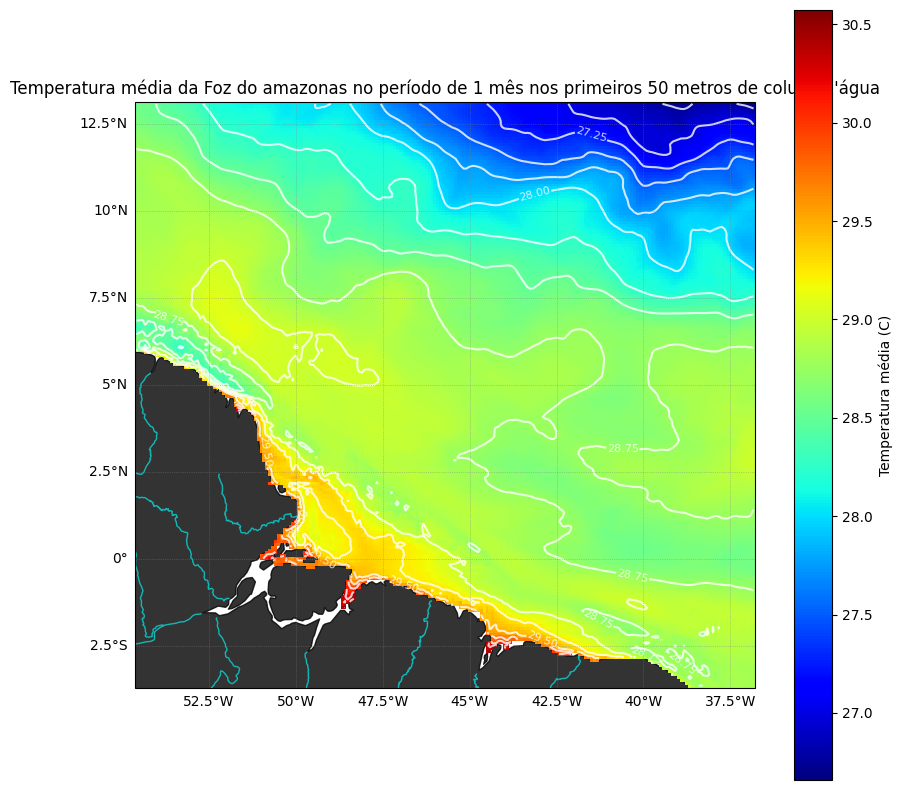

In [16]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection=ccrs.PlateCarree())

pca = ax.pcolormesh(longitude,latitude,temperatura_media,transform=ccrs.PlateCarree(),cmap='jet')
cntr = ax.contour(longitude, latitude, temperatura_media, levels=17, transform=ccrs.PlateCarree(),linewidth=0.5, colors='w',alpha=0.8)
ax.clabel(cntr, levels=cntr.levels[::3], colors='w', fontsize=8)

c = plt.colorbar(pca, ax=ax)
c.set_label('Temperatura média (C)')
ax.add_feature(cfeature.LAND, color='k', alpha=0.8)
ax.add_feature(cfeature.RIVERS.with_scale('10m'), edgecolor='aqua',alpha=0.65)

gl = ax.gridlines(crs=ccrs.PlateCarree(),draw_labels=True, linewidth=0.5,color='gray',alpha=0.7, linestyle=':')
gl.top_labels = False
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
ax.set_title("Temperatura média da Foz do amazonas no período de 1 mês nos primeiros 50 metros de coluna d'água")
plt.show()